In [1]:
import requests
url = 'https://raw.githubusercontent.com/yigitatesh/ml/main/plots.py'
r = requests.get(url)

with open('plots.py', 'w') as f:
    f.write(r.text)

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.stats import mode

from plots import knn_classifier_plot

from sklearn.datasets import make_classification

# Create Data

In [5]:
# classification 1
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, random_state=3)

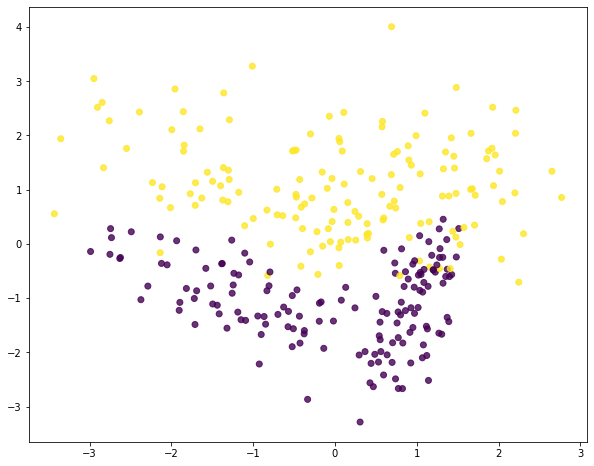

In [6]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

## K-Nearest Neighbour Classifier

In [8]:
# KNNClassifier class
class KNNClassifier:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        return self
    
    def predict(self, X):
        return np.array([self._predict(row) for row in X])
    
    def _predict(self, row):
        distances = ((self.X_train - row)**2).sum(axis=1) ** 0.5
        sorted_indices = distances.argsort()
        predictions = self.y_train[sorted_indices][:self.n_neighbors]
        
        return mode(predictions)[0][0]
    
    def score(self, X, y):
        preds = self.predict(X)
        return (preds == y).mean()

In [17]:
# fit KNN Classifier
knn = KNNClassifier(n_neighbors=3).fit(X, y)

In [18]:
knn.score(X, y)

0.95

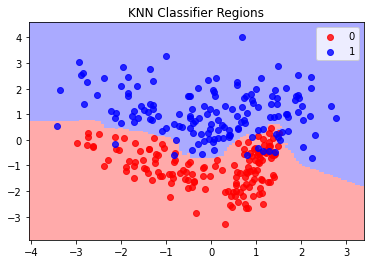

In [19]:
# visualize classifier
knn_classifier_plot(knn, X, y, labels=[0, 1])

## Comparison of KNN models with different K values

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

k: 1, train score: 1.0, test score: 0.9333333333333333


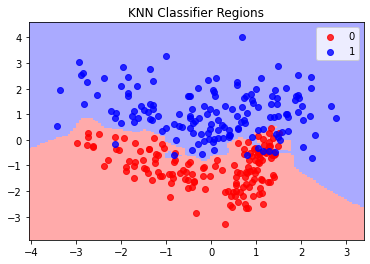

k: 3, train score: 0.96, test score: 0.9333333333333333


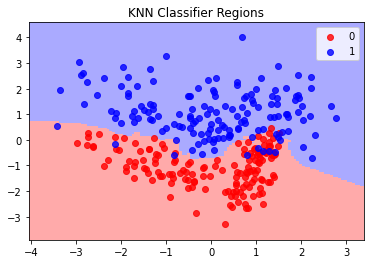

k: 5, train score: 0.96, test score: 0.9333333333333333


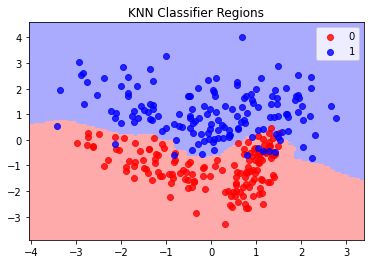

k: 7, train score: 0.9555555555555556, test score: 0.9333333333333333


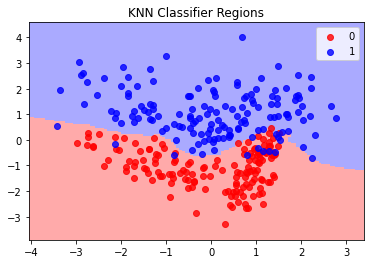

k: 9, train score: 0.9511111111111111, test score: 0.9333333333333333


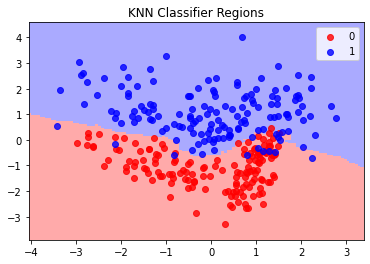

k: 11, train score: 0.9466666666666667, test score: 0.9333333333333333


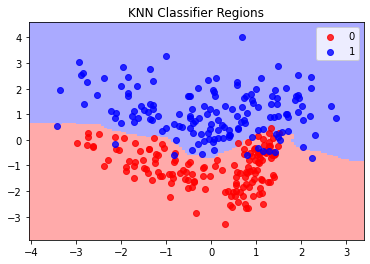

k: 13, train score: 0.9511111111111111, test score: 0.9333333333333333


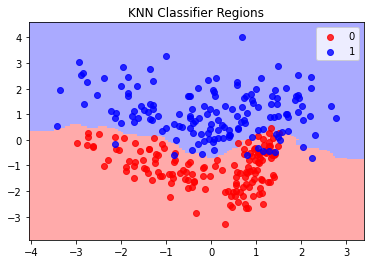

k: 15, train score: 0.9422222222222222, test score: 0.9466666666666667


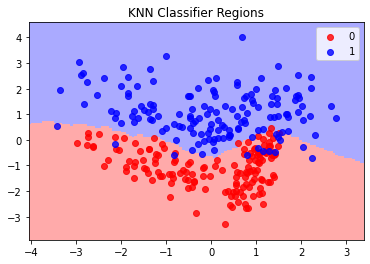

In [22]:
# compare k values
k_values = list(range(1, 16, 2))
train_scores, test_scores = [], []
# loop for k values
for k in k_values:
    knn = KNNClassifier(n_neighbors=k).fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)

    print("k: {}, train score: {}, test score: {}".format(k, train_score, test_score))
    train_scores.append(train_score)
    test_scores.append(test_score)
    knn_classifier_plot(knn, X, y, labels=[0, 1])

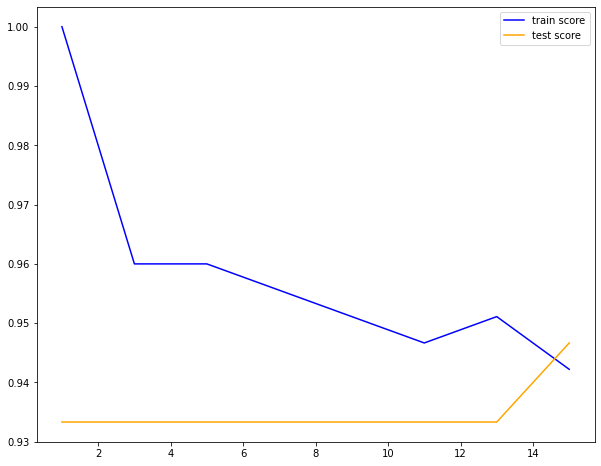

In [23]:
# plot scores
plt.figure(figsize=(10, 8))
plt.plot(k_values, train_scores, color="blue", label="train score")
plt.plot(k_values, test_scores, color="orange", label="test score")
plt.legend()

# KNN Regressor

In [24]:
# KNNRegressor class
class KNNRegressor:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        return self
    
    def predict(self, X):
        return np.array([self._predict(row) for row in X])
    
    def _predict(self, row):
        distances = ((self.X_train - row)**2).sum(axis=1) ** 0.5
        sorted_indices = distances.argsort()
        predictions = self.y_train[sorted_indices][:self.n_neighbors]
        
        return np.mean(predictions)
    
    def score(self, X, y):
        """1-u/v"""
        preds = self.predict(X)
        u = np.mean((preds - y)**2)
        v = np.mean((preds - y.mean())**2)
        return 1-u/v

## Load Regression Data

In [127]:
# cars data
df = pd.read_csv("https://raw.githubusercontent.com/yigitatesh/ml/main/datasets/cars_updated.csv")
df.head(3)

,height,length,width,driveline,engine,gears,transmission,cty,fuel_type,hwy,id,make,model_year,year,hp,torque,model,km_per_l_cty,km_per_l_hwy
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,6,Automatic,18,Gasoline,25,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236,Audi A3,6.343612,8.810573
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,6,Automatic,22,Gasoline,28,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207,Audi A3,7.753304,9.867841
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,6,Manual,21,Gasoline,30,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207,Audi A3,7.400881,10.572687


In [128]:
# X and y values
X = df["hp"].values.reshape(-1, 1)
y = df["torque"].values

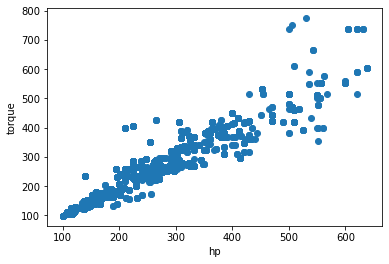

In [129]:
# visualize data
plt.figure()
plt.xlabel("hp")
plt.ylabel("torque")
plt.scatter(X, y)

## Fit KNN Regressor

In [29]:
knn_reg = KNNRegressor(3).fit(X, y)

In [30]:
knn_reg.score(X, y)

0.9257911190104341

In [32]:
# train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

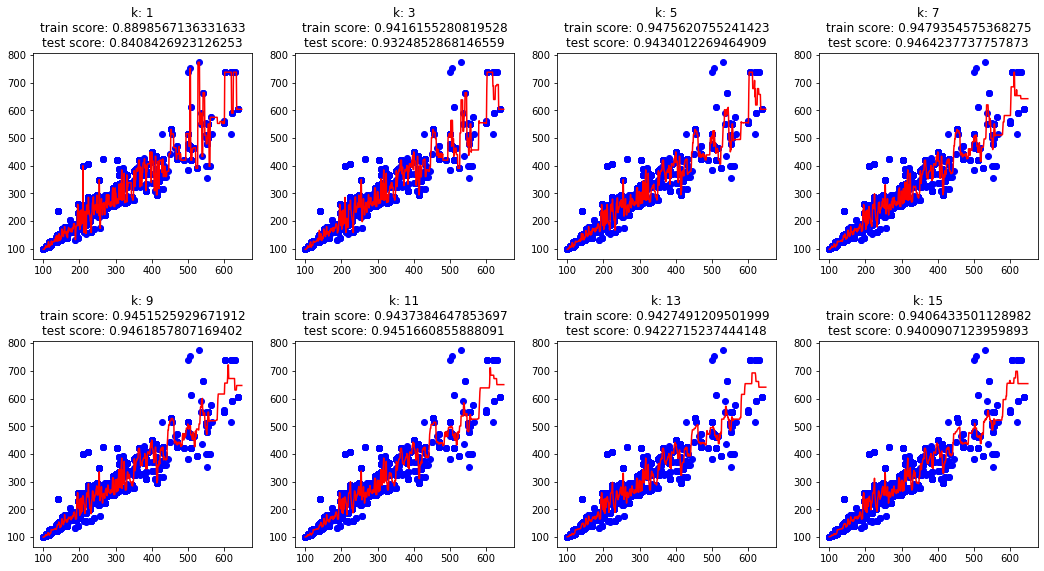

In [33]:
# Comparison of KNN Regression models with different K values
k_values = list(range(1, 16, 2))
train_scores, test_scores = [], []
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(18, 7))
ax = ax.ravel()

# loop for k values
for i in range(len(k_values)):
    # fit class and evaluate it
    k = k_values[i]
    knn = KNNRegressor(n_neighbors=k).fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)
    
    # visualize results
    ax[i].set_title("k: {}\ntrain score: {}\ntest score: {}".format(k, train_score, test_score))
    ax[i].scatter(X, y, color="blue")
    interval = np.arange(100, 650, 1)
    preds = knn.predict(interval.reshape(-1, 1))
    ax[i].plot(interval, preds, color="red")
    
# adjust spaces between plots
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.2)

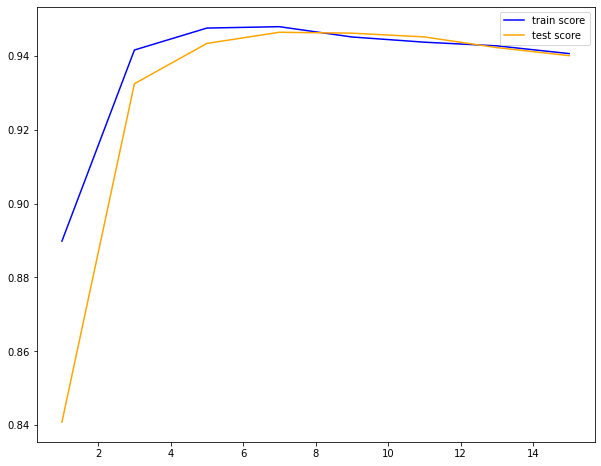

In [34]:
# plot scores
plt.figure(figsize=(10, 8))
plt.plot(k_values, train_scores, color="blue", label="train score")
plt.plot(k_values, test_scores, color="orange", label="test score")
plt.legend()

## Create Data for Clustering

In [35]:
from sklearn.datasets import make_blobs

In [36]:
# create data
X, y = make_blobs(n_samples=400, n_features=2, centers=3, random_state=100)

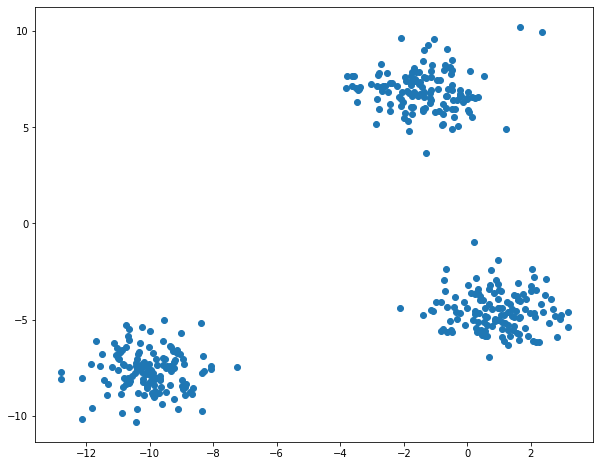

In [38]:
# plot data
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1])

# K Means Clustering

Steps for K-Means Clustering: <br>
1) Select K random points as cluster centers called centroids. <br>
Repeat until convergence: <br>
2) Assign each data point to the closest cluster with respect to each centroid. <br>
3) Shift cluster centroids to center of their clusters. <br>

In [46]:
# KMeans Clustering class
class KMeans:
    def __init__(self, n_clusters=3, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        
    def fit(self, X):
        # define y
        y = np.zeros(X.shape[0])
        
        # initalize centroids
        self.centroids = self.initialize_centroids(X)
        
        for i in range(self.max_iter):
            # update labels
            y = self.update_labels(X, y)
            
            # update centroids
            self.update_centroids(X, y)
            
        return self
        
    def predict(self, X):
        y = np.zeros(X.shape[0])
        y = self.update_labels(X, y)
        return y
        
    def initialize_centroids(self, X):
        centroids = []
        random_indexes = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        for index in random_indexes:
            centroid = X[index]
            centroids.append(centroid)
        return np.array(centroids)
    
    def update_labels(self, X, y):
        for i in range(len(y)):
            distances = ((self.centroids - X[i])**2).sum(axis=1) ** 0.5
            closest_cluster = distances.argmin()
            y[i] = closest_cluster
        return y
    
    def update_centroids(self, X, y):
        for i in range(len(self.centroids)):
            cluster_indexes = (y == i)
            center = X[cluster_indexes, :].mean(axis=0)
            self.centroids[i] = center

In [69]:
# fit kmeans
kmeans = KMeans(n_clusters=3).fit(X)

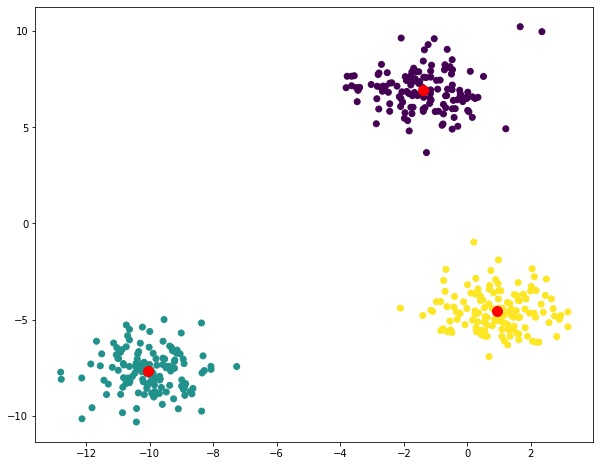

In [70]:
# predict and visualize
# red points are centroids for each cluster
preds = kmeans.predict(X)

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=preds)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
            color="red", s=100)

## Plot Learning Process of KMean Model

In [71]:
class KMeans:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def _init_random_centroids(self, X):
        centroids = []
        # random indexes
        indexes = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        for index in indexes:
            centroid = X[index]
            centroids.append(centroid)
        return np.array(centroids)

    def _calculate_labels(self, X, y, centroids):
        for i, row in enumerate(X):
            # calculate distances
            distances = ((centroids - row) ** 2).sum(axis=1) ** 0.5
            centroid_index = distances.argmin()
            y[i] = centroid_index
        return y

    def _update_centroids(self, X, y, centroids):
        # update each centroid to it's cluster's middle point
        for i in range(len(self.centroids)):
            cluster_indexes = y == i
            mean_point = X[cluster_indexes, :].mean(axis=0)
            self.centroids[i] = mean_point
        return self.centroids

    def fit(self, X):
        n_samples, n_features = X.shape
        y = np.zeros(X.shape[0])
        
        # initialize random centroids
        self.centroids = self._init_random_centroids(X)
        
        fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 7))
        ax = ax.ravel()
        
        # loop until convergence
        for i in range(self.max_iter):
            # calculate labels for each data point by finding the closest centroid
            y = self._calculate_labels(X, y, self.centroids)
            
            # visualize
            if i < 8:
                ax[i].set_title("iteration: {}".format(i))
                ax[i].scatter(X[:, 0], X[:, 1], c=y)
                ax[i].scatter(self.centroids[:, 0], self.centroids[:, 1],
                          color="red", s=100)

            # update centroids
            self.centroids = self._update_centroids(X, y, self.centroids)
    
        plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.2)
    
        return self

    def predict(self, X):
        y = np.zeros(X.shape[0])
        y = self._calculate_labels(X, y, self.centroids)
        return y

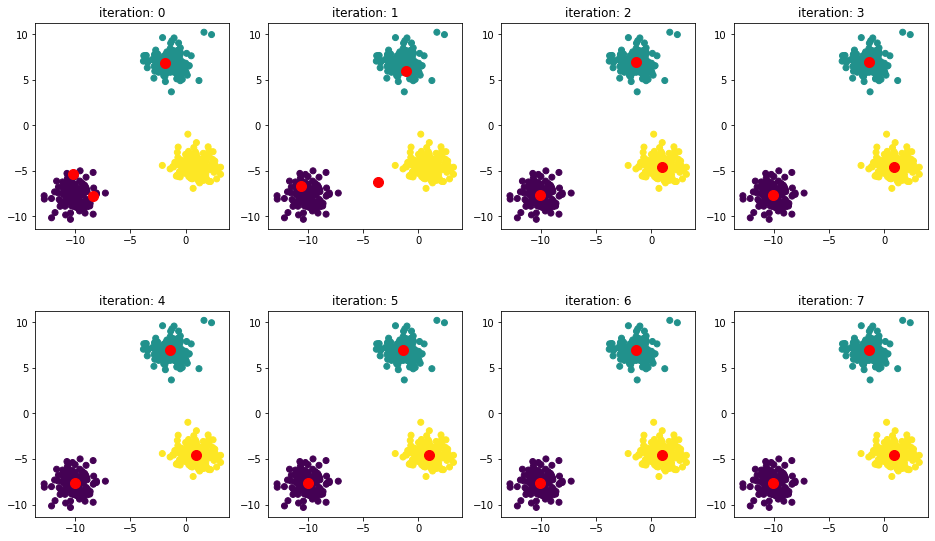

In [73]:
# visualize iterations in learning phase
kmeans = KMeans(n_clusters=3).fit(X)

# Movie Recommendation

In [131]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

## Load Movies Data

In [132]:
url = "https://raw.githubusercontent.com/yigitatesh/ml/main/datasets/imdb_movies.csv"

df = pd.read_csv(url)
df.head()

,Title,Year,Genres,Rating,NumVotes
0,The Birth of a Nation,1915,"Drama,History,War",6.3,22898
1,Intolerance: Love's Struggle Throughout the Ages,1916,"Drama,History",7.7,14303
2,The Cabinet of Dr. Caligari,1920,"Fantasy,Horror,Mystery",8.1,57783
3,The Kid,1921,"Comedy,Drama,Family",8.3,114417
4,The Phantom Carriage,1921,"Drama,Fantasy,Horror",8.1,10832


## Data Exploration

In [133]:
df.shape

(9028, 5)

In [135]:
# top rates
df.sort_values("Rating", ascending=False).head(10)

,Title,Year,Genres,Rating,NumVotes
2304,The Shawshank Redemption,1994,Drama,9.3,2359094
3485,The Chaos Class,1975,"Comedy,Drama",9.3,37601
7576,CM101MMXI Fundamentals,2013,"Comedy,Documentary",9.2,44034
719,The Godfather,1972,"Crime,Drama",9.2,1632639
8421,Mirror Game,2016,"Crime,Mystery,Thriller",9.1,23284
1133,The Marathon Family,1982,"Comedy,Drama",9.0,14582
332,12 Angry Men,1957,"Crime,Drama",9.0,695613
5920,David Attenborough: A Life on Our Planet,2020,"Biography,Documentary",9.0,25190
3500,Tosun Pasa,1976,"Comedy,History",9.0,21686
794,The Godfather: Part II,1974,"Crime,Drama",9.0,1137834


In [138]:
# we can do some kind of NumVotes thresh to get rid of noise data (like Tosun Pasa :D)
# we eliminate movies with Vote Counts(NumVotes) less than 50000
df[df["NumVotes"] > 50000].sort_values("Rating", ascending=False).head(10)

,Title,Year,Genres,Rating,NumVotes
2304,The Shawshank Redemption,1994,Drama,9.3,2359094
719,The Godfather,1972,"Crime,Drama",9.2,1632639
332,12 Angry Men,1957,"Crime,Drama",9.0,695613
794,The Godfather: Part II,1974,"Crime,Drama",9.0,1137834
4880,The Dark Knight,2008,"Action,Crime,Drama",9.0,2318379
3138,The Lord of the Rings: The Return of the King,2003,"Action,Adventure,Drama",8.9,1652513
2289,Pulp Fiction,1994,"Crime,Drama",8.9,1838577
2155,Schindler's List,1993,"Biography,Drama,History",8.9,1220860
8517,The Mountain II,2016,"Action,Drama,War",8.8,105406
2991,Fight Club,1999,Drama,8.8,1867266


In [139]:
# worst rates
df.sort_values("Rating").head(10)

,Title,Year,Genres,Rating,NumVotes
8776,Cumali Ceber,2017,Comedy,1.0,38059
8866,Sadak 2,2020,"Action,Drama",1.1,65097
8563,Reis,2017,"Biography,Drama",1.4,72573
8086,Kirk Cameron's Saving Christmas,2014,"Comedy,Family",1.4,15116
5982,Jonas Brothers: The 3D Concert Experience,2009,"Documentary,Music",1.6,17240
6734,Justin Bieber: Never Say Never,2011,"Documentary,Music",1.6,75075
7781,Justin Bieber's Believe,2013,"Documentary,Music",1.7,17587
4548,Daniel the Wizard,2004,"Comedy,Crime,Fantasy",1.7,13857
5191,Turks in Space,2006,"Action,Comedy,Sci-Fi",1.7,15747
1657,Going Overboard,1989,Comedy,1.8,12309


## Prepare to Machine Learning

In [140]:
# X and y data
X = df.drop("Title", axis=1)
y = df["Title"]

In [141]:
# One hot encoding of Genres
genres_df = df["Genres"].str.replace(",", "|").str.get_dummies()
genres_df.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [142]:
# Combine X and Genres
X = pd.concat([X, genres_df], axis=1).drop("Genres", axis=1)
X.head()

,Year,Rating,NumVotes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1915,6.3,22898,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1916,7.7,14303,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1920,8.1,57783,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1921,8.3,114417,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1921,8.1,10832,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
# scaling columns
scaler = MinMaxScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

,Year,Rating,NumVotes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0.000000,0.638554,0.005489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.009434,0.807229,0.001830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.047170,0.855422,0.020340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.056604,0.879518,0.044449,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.056604,0.855422,0.000353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
# fit KNN model
knn = KNeighborsClassifier().fit(X_scaled.values, y.values)

## Recommend Similar Movies

In [153]:
# recommend for a movie
movie_name = "Batman Begins"
n_movies = 10

# find index of movie in dataset
index = y[y == movie_name].index[0]

# get X data of movie
data = X_scaled.iloc[index, :].values.reshape(1, -1)

# find closest movies (this finds indexes of movies)
indexes = knn.kneighbors(data, n_neighbors=n_movies)[1].ravel()

# get names of movies
movie_names = y.iloc[indexes].values

for movie in movie_names:
    print(movie)

Batman Begins
The Dark Knight Rises
Indiana Jones and the Raiders of the Lost Ark
Indiana Jones and the Last Crusade
Indiana Jones and the Temple of Doom
Batman
Indiana Jones and the Kingdom of the Crystal Skull
First Blood
War of the Arrows
Batman Forever


In [151]:
# if you don't know full movie name, you can find the full names with this code
# enter some part of movie name (for example: "batman" for "Batman Begins")
part_of_movie_name = "batman"

# find movie names which contain it
similar_names = y[y.str.lower().str.contains(part_of_movie_name)]
print(similar_names)

545                      Batman: The Movie
1659                                Batman
1955                        Batman Returns
2070          Batman: Mask of the Phantasm
2338                        Batman Forever
2637                        Batman & Robin
4197                         Batman Begins
7725    Batman v Superman: Dawn of Justice
8110                 The Lego Batman Movie
8303              Batman: The Killing Joke
8669               Batman and Harley Quinn
8769            Batman: Gotham by Gaslight
8806                          Batman Ninja
Name: Title, dtype: object


# Recommend Movies Function

In [186]:
# USE THIS FUNCTION TO GET RECOMMENDATIONS
def recommend_movies(movie_name, n_movies=10):
    # lowercase movie name
    movie_name = movie_name.lower()
    
    # if movie is found
    if y[y.str.lower() == movie_name].size != 0: 
        # find index of movie in dataset
        index = y[y.str.lower() == movie_name].index[0]

        # get X data of movie
        data = X_scaled.iloc[index, :].values.reshape(1, -1)

        # find closest movies (this finds indexes of movies)
        indexes = knn.kneighbors(data, n_neighbors=n_movies+1)[1].ravel()

        # get names of movies
        # do not get first movie as it is the same movie
        movie_names = y.iloc[indexes].values[1:]
    
        print("\nOur Recommendations\n")
        for i, movie in enumerate(movie_names):
            print("{}. {}".format(i+1, movie))
    
    # if movie is not found, find similar movie names
    elif y[y.str.lower().str.contains(movie_name)].size != 0:
        # find similar names
        similar_names = y[y.str.lower().str.contains(movie_name)].values
        
        print("\nCould not Find Movie: {}".format(movie_name))
        print("But Found Similar Movie Names:\n")
        for name in similar_names:
            print(name)
    
    # Could not find anything
    else:
        print("\nCould not Find Anything.")
        print("Try with a different movie name.")

In [187]:
# call the recommend function
recommend_movies("Ip Man", n_movies=10)


Our Recommendations

1. Fearless
2. Ip Man 2
3. Lone Survivor
4. Dangal
5. Rescue Dawn
6. The Legend of Bhagat Singh
7. Rush
8. Ford v Ferrari
9. Unbroken
10. Max Manus
